In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
sns.set()

In [3]:
#Import raw data
raw_data_import = pd.read_csv('Mall_Customers.csv')
raw_data = raw_data_import.drop(columns=['CustomerID'],axis=1)
raw_data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [4]:
#Mapping Female/Male to 1 and 0
raw_data['Genre'] = raw_data['Genre'].map({'Male':0,'Female':1})
raw_data.describe()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


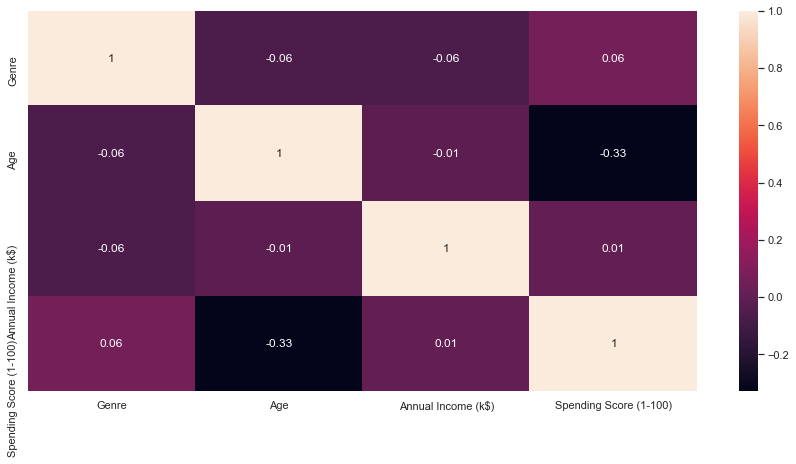

In [5]:
corr_matrix = raw_data.corr().round(2)
ax = plt.figure(figsize=(15,7))
ax = sns.heatmap(corr_matrix,annot=True)

No clear correlaction between features and target (spending score). Time to go clustering

C:\Users\gnser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gnser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

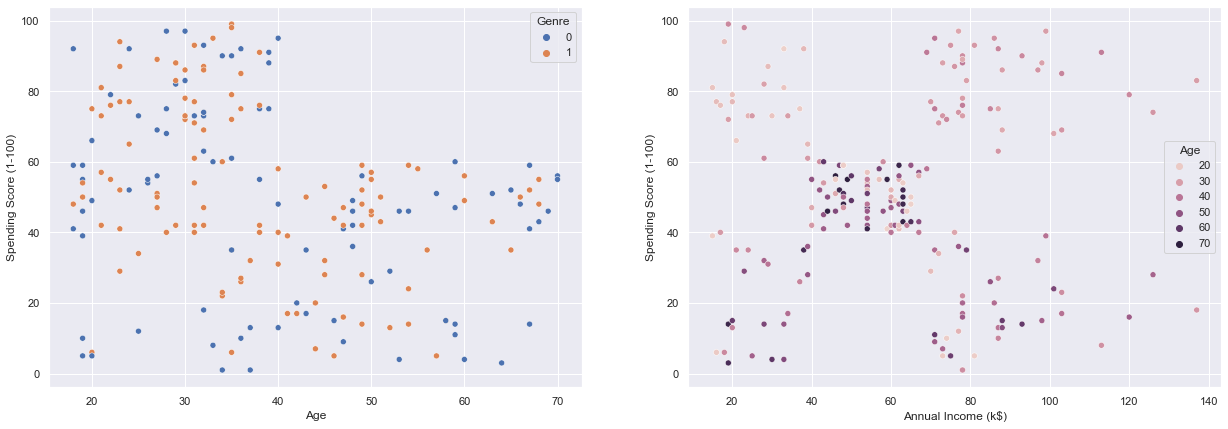

In [6]:
#Scatter plots to see who the data is spread. 2 features, 2 plots

plt.figure(figsize=(21,7))
plt.subplot(1,2,1)
sns.scatterplot(raw_data['Age'],raw_data['Spending Score (1-100)'],cmap = 'rainbow',hue=raw_data['Genre'])
plt.subplot(1,2,2)
sns.scatterplot(raw_data['Annual Income (k$)'],raw_data['Spending Score (1-100)'],cmap = 'rainbow',hue=raw_data['Age'])

In [7]:
#By the scatter plot, it makes more sense to work with Annual Income and Spending Score
#Defining features
features = raw_data[['Annual Income (k$)','Spending Score (1-100)']]

In [8]:
#Calculatting wcss
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for.
# Note that 'range' doesn't include the upper boundery
max_clusters = 11
for i in range (1,max_clusters):
    kmeans= KMeans(i)
    kmeans.fit(features)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

Text(0, 0.5, 'Within-cluster Sum of Squares')

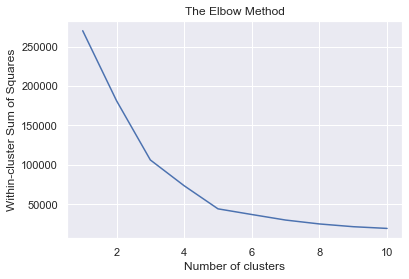

In [9]:
#Elbow plot
number_clusters = range(1,max_clusters)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

By the elbow method we can use 6 clusters.

In [10]:
#Define k
cluster = KMeans(6)
#cluster
clustering = cluster.fit(features)
#identify cluster
identified_clusters = clustering.fit_predict(features)

#Put cluster at raw_data
raw_data['Clusters'] = identified_clusters
raw_data

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,19,15,39,5
1,0,21,15,81,3
2,1,20,16,6,5
3,1,23,16,77,3
4,1,31,17,40,5
...,...,...,...,...,...
195,1,35,120,79,2
196,1,45,126,28,0
197,0,32,126,74,2
198,0,32,137,18,0


C:\Users\gnser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

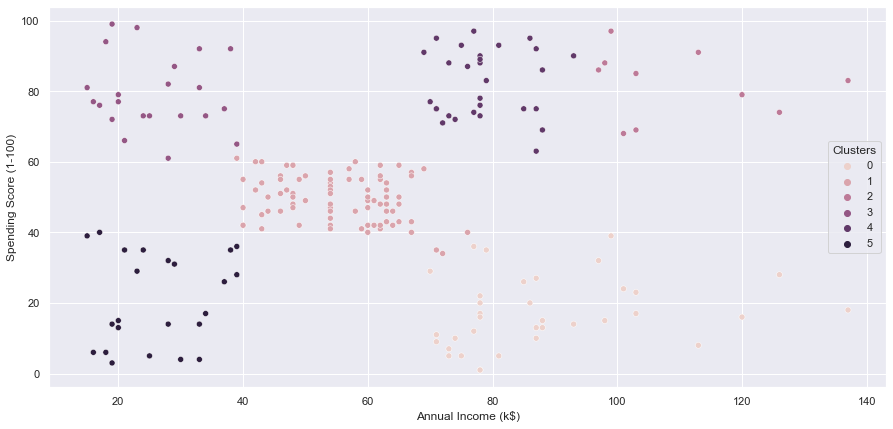

In [11]:
#Scatter plots with clusters

plt.figure(figsize=(15,7))
sns.scatterplot(raw_data['Annual Income (k$)'],raw_data['Spending Score (1-100)'],hue=raw_data['Clusters'])

Text(0, 0.5, 'Within-cluster Sum of Squares')

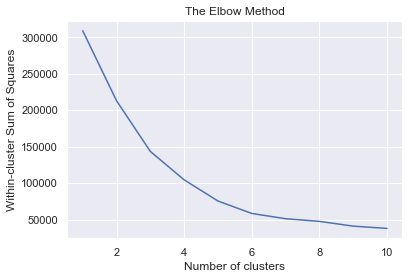

In [12]:
#working with 3 features
features = raw_data[['Age','Annual Income (k$)','Spending Score (1-100)']]

#Calculatting wcss
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for.
# Note that 'range' doesn't include the upper boundery
max_clusters = 11
for i in range (1,max_clusters):
    kmeans= KMeans(i)
    kmeans.fit(features)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
#Elbow plot
number_clusters = range(1,max_clusters)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [13]:
#Define k
cluster = KMeans(6)
#cluster
clustering = cluster.fit(features)
#identify cluster
identified_clusters = clustering.fit_predict(features)

#Put cluster at raw_data
raw_data['Clusters'] = identified_clusters
raw_data

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,19,15,39,2
1,0,21,15,81,0
2,1,20,16,6,2
3,1,23,16,77,0
4,1,31,17,40,2
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,5
197,0,32,126,74,1
198,0,32,137,18,5


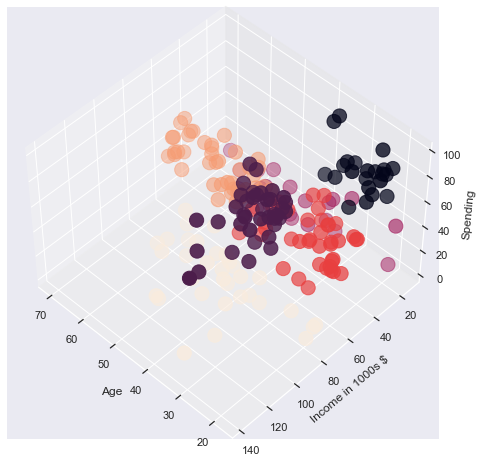

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Age')
ax.set_ylabel('Income in 1000s $')
ax.set_zlabel('Spending')
labels = raw_data['Clusters']
ax.scatter(raw_data['Age'], raw_data['Annual Income (k$)'], raw_data['Spending Score (1-100)'],c= labels.astype(float), s=200)

In [18]:
#Iteractive 3D plot
from matplotlib import interactive
interactive(True)

%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Age')
ax.set_ylabel('Income in 1000s $')
ax.set_zlabel('Spending')
labels = raw_data['Clusters']
ax.scatter(raw_data['Age'], raw_data['Annual Income (k$)'], raw_data['Spending Score (1-100)'],c= labels.astype(float), s=200)